In [ ]:
# import pandas, load data, and show some basic info about the data
import pandas as pd
disease = pd.read_csv("disease.csv")
print(disease.head())
print(disease.tail())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   PedigreeFunction  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0

This data seems to have lots of missing / zero values. 

In [ ]:
# show more info about the data
print(disease.isnull().sum)
print(disease.info())

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     PedigreeFunction    Age  Outcome

In [ ]:
# Work with some of the missing values
disease['Insulin'] = disease['Insulin'].replace(0, disease['Insulin'].median())
disease['SkinThickness'] = disease['SkinThickness'].replace(0, disease['Insulin'].median())
disease['BMI'] = disease['BMI'].replace(0, disease['BMI'].median())
disease['BloodPressure'] = disease['BloodPressure'].replace(0, disease['BloodPressure'].median())

<AxesSubplot:>

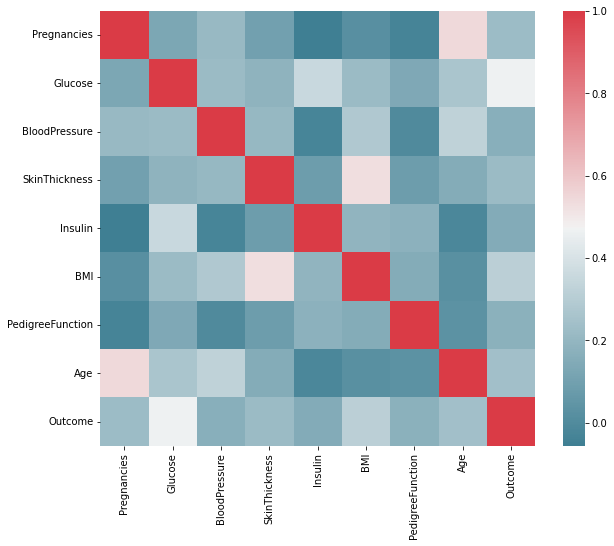

In [ ]:
# Plot the data and see if any features are highly correlated
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
f, ax = plt.subplots(figsize = (10, 8))
corr = disease.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)

None of the features appear to be very highly correlated, so we should probably keep all of them as we attempt to make our model.

In [ ]:
# Next, we split our data into X and Y
X = disease.drop(['Outcome'], axis = 1)
Y = disease['Outcome']

In [ ]:
# Split the data for testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Standardize the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fit = mm.fit(X_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)
X_train.shape[1]

8

In [ ]:
# Set up the feed-forward neural network model
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(16, activation = 'tanh'))
model.add(Dropout(0.01))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

# can add Dropout layer with parameter between 0-1

In [ ]:
# Compile the model for the disease dataset
import tensorflow as tf
opt = tf.keras.optimizers.experimental.AdamW(learning_rate = 0.001)
#opt = tf.keras.optimizers.SGD(learning_rate = 0.005)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 250, batch_size = 32, verbose = 1, validation_data = (X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/250
20/20 [==============================] - 2s 15ms/step - loss: 0.6934 - accuracy: 0.6498 - val_loss: 0.6559 - val_accuracy: 0.6623
Epoch 2/250
20/20 [==============================] - 0s 7ms/step - loss: 0.6640 - accuracy: 0.6531 - val_loss: 0.6481 - val_accuracy: 0.6753
Epoch 3/250
20/20 [==============================] - 0s 6ms/step - loss: 0.6553 - accuracy: 0.6515 - val_loss: 0.6397 - val_accuracy: 0.6818
Epoch 4/250
20/20 [==============================] - 0s 6ms/step - loss: 0.6495 - accuracy: 0.6531 - val_loss: 0.6320 - val_accuracy: 0.6883
Epoch 5/250
20/20 [==============================] - 0s 6ms/step - loss: 0.6432 - accuracy: 0.6564 - val_loss: 0.6247 - val_accuracy: 0.6818
Epoch 6/250
20/20 [==============================] - 0s 9ms/step - loss: 0.6363 - accuracy: 0.6580 - val_loss: 0.6188 - val_accuracy: 0.6818
Epoch 7/250
20/20 [==============================] - 0s 9ms/step - loss: 0.6275 - accuracy: 0.6612 - val_loss: 0.6126 - val_accuracy: 0.6753
Epoch 8/250


In [ ]:
# Set up data to create the confusion matrix
Y_pred = model.predict(X_test)

actual = Y_test
predicted = np.around(Y_pred)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

5/5 [==============================] - 0s 3ms/step
Actual: 53     1
389    0
754    1
637    0
47     0
      ..
595    1
313    0
345    0
339    1
75     0
Name: Outcome, Length: 154, dtype: int64
Predicted: [[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.

In [ ]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, predicted)
cm

array([[88, 14],
       [22, 30]])

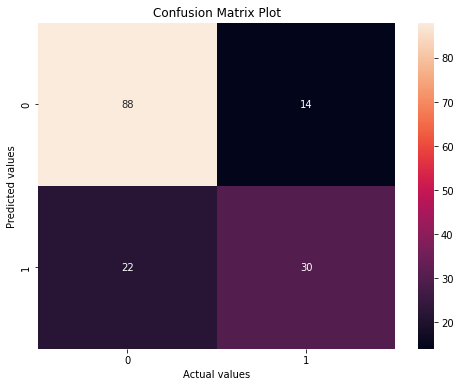

In [ ]:
# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm_df = pd.DataFrame(cm, index = ['0', '1'], columns = ['0', '1'])
plt.figure(figsize = (8, 6))
sns.heatmap(cm_df, annot = True)
plt.title('Confusion Matrix Plot')
plt.ylabel('Predicted values')
plt.xlabel('Actual values')
plt.show()

This one has the best results so far - 17 false positives, 14 false negatives, 96 true negatives, and 27 true positives. I replaced all 0 values with the median for their respective column, and added a dropout layer with a value of 0.1.

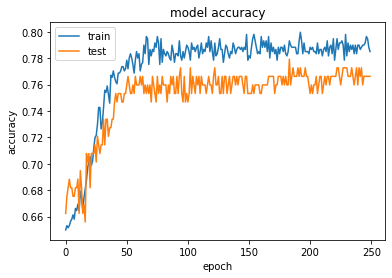

In [ ]:
# Graph the model accuracy over time
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()